<H3 align = "right">Fall 2024 Computer_Project_2</H3>

## Group Number: 8

## Names of Student in Group:
- Name: Monique Kubovsky
- Name: Jason Li
- Name: Ibet Gonzalez Viltres

---  
# Question 1

Contributions from Question 1:
- Jason Li: Wrote and tested code
- Monique Kubovsky: Reviewed Code
- Ibet Gonzalez Viltres: Reviewed Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.optimize import curve_fit

## 1a) Approximate f(1.4) for 4 different polynomials

In [2]:
x_i = [1,1.25,1.6,1.8] 
def f(x): return np.sin(np.pi * x)
x = 1.4
y_i = [f(x_i[0]),  f(x_i[1]), f(x_i[2]), f(x_i[3])]
p_12 = lagrange(x_i[1:3],y_i[1:3])
p_012 = lagrange(x_i[0:3],y_i[0:3])
p_123 = lagrange(x_i[1:4],y_i[1:4])
p_0123 = lagrange(x_i[0:4],y_i[0:4]) 
y_12 = p_12(x)
y_012 = p_012(x)
y_123 = p_123(x)
y_0123 = p_0123(x)
print("P_12(1.4): ", y_12) 
print("P_012(1.4): ", y_012)
print("P_123(1.4): ", y_123)
print("P_0123(1.4): ", y_0123)
print("True value: ", f(x))


P_12(1.4):  -0.8116566676616641
P_012(1.4):  -0.9182280617406038
P_123(1.4):  -0.948748789289704
P_0123(1.4):  -0.9334884255151685
True value:  -0.9510565162951535


$P_{1,2}(1.4)$:  -0.8116566676616641

$P_{0,1,2}(1.4)$:  -0.9182280617406038

$P_{1,2,3}(1.4)$:  -0.948748789289704

$P_{0,1,2,3}(1.4)$:  -0.9334884255151685

True value:  -0.9510565162951535


## 1b) Compute the absolute error for each polynomial

In [3]:
diff_12 = np.abs(y_12 - f(x))
diff_012 = np.abs(y_012 - f(x))
diff_123 = np.abs(y_123 - f(x))
diff_0123 = np.abs(y_0123 - f(x))
print("Absolute error of P_12(1.4): ", diff_12) 
print("Absolute error of P_012(1.4): ", diff_012)
print("Absolute error of P_123(1.4): ", diff_123)
print("Absolute error of P_0123(1.4): ", diff_0123)

Absolute error of P_12(1.4):  0.13939984863348942
Absolute error of P_012(1.4):  0.032828454554549746
Absolute error of P_123(1.4):  0.002307727005449567
Absolute error of P_0123(1.4):  0.017568090779985


Absolute error of $P_{1,2}$(1.4):  0.13939984863348942

Absolute error of $P_{0,1,2}$(1.4):  0.032828454554549746

Absolute error of $P_{1,2,3}$(1.4):  0.002307727005449567

Absolute error of $P_{0,1,2,3}$(1.4):  0.017568090779985

Based on these values, we can see that the interpolating quadratic ($P_{1,2,3}$(x)) is best since it has the lowest absolute error

## 1c) Error bounds for each polynomial

In [4]:
def f2(x): return -np.sin(np.pi * x) * (np.pi ** 2) # second derivative
def f3(x): return -np.cos(np.pi * x) * (np.pi ** 3) # third derivative
def f4(x): return np.sin(np.pi * x) * (np.pi ** 4) # fourth derivative
interval12 = [x_i[1],x_i[2]]
interval012 = [x_i[0],x_i[2]]
interval123 = [x_i[1],x_i[3]]
interval0123 = [x_i[0],x_i[3]]
maxf2_12 = np.max(abs(f2(np.linspace(interval12[0], interval12[1], 10000)))) # max of second derivative on interval 1.25,1.6
    # true max for above is at abs(f2(1.5)) when derived by hand
maxf3_012 = np.max(abs(f3(np.linspace(interval012[0], interval012[1], 10000)))) # max of third derivative on interval 1, 1.6
    # true max for above is at abs(f3(1)) when derived by hand
maxf3_123 = np.max(abs(f3(np.linspace(interval123[0], interval123[1], 10000)))) # max of third derivative on interval 1.25, 1.8
    # true max for above is at abs(f3(1.8)) when derived by hand
maxf4_0123 = np.max(abs(f4(np.linspace(interval012[0], interval012[1], 10000)))) # max of fourth derivative on interval 1, 1.8
    # true max for above is at abs(f4(1.5)) when derived by hand

# compute error terms
eb12 = abs(maxf2_12 / (2 * 1) * (x-x_i[1]) * (x-x_i[2]))
eb012 = abs(maxf3_012 / (3 * 2 * 1) * (x-x_i[0]) * (x-x_i[1]) * (x-x_i[2]))
eb123 = abs(maxf3_123 / (3 * 2 * 1) * (x-x_i[1]) * (x-x_i[2]) * (x-x_i[3]))
eb0123 = abs(maxf4_0123 / (4 * 3 * 2 * 1) * (x-x_i[0]) * (x-x_i[1]) * (x-x_i[2]) * (x-x_i[3]))
print("Error bound for P_12(1.4): ", eb12) 
print("Error bound for P_012(1.4): ", eb012)
print("Error bound for P_123(1.4): ", eb123)
print("Error bound for P_0123(1.4): ", eb0123)

Error bound for P_12(1.4):  0.14804406599807254
Error bound for P_012(1.4):  0.06201255336059963
Error bound for P_123(1.4):  0.05016920953330838
Error bound for P_0123(1.4):  0.01948181812025816


Error bound for $P_{1,2}$(1.4):  0.14804406599807254

Error bound for $P_{0,1,2}$(1.4):  0.06201255336059963

Error bound for $P_{1,2,3}$(1.4):  0.05016920953330838

Error bound for $P_{0,1,2,3}$(1.4):  0.01948181812025816

Based on these values, we can see that the interpolating cubic ($P_{0,1,2,3}$(x)) has the best (lowest) error bound. These error bounds make sense because all the errors in part (b) are less than their corresponding error bounds here. We can see that this result of which polynomial is best is different from part (b).

---  
# Question 2

Contributions from Question 2:
- Jason Li: Wrote and tested code
- Monique Kubovsky: Reviewed Code
- Ibet Gonzalez Viltres: Reviewed Code

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.optimize import curve_fit

## 2a) Use the divided-difference formula to construct an interpolating polynomial from the given set of data

In [6]:
x = [0.1, .2, .3, .4]
fx = [ -0.62049958, -0.28398668, 0.00660095, .24842440]
n = 4
table = np.zeros([4, 4])
table[:,0] = fx
# constructing the table
for col in range(1,n):
    for row in range(0,n - col):
        table[row][col] = (table[row + 1][col - 1] - table[row][col - 1])/(x[row + col] - x[row])
print(table)

def approx(x_i, matrx, xVal):
    coefs = matrx[0]
    elements = coefs.size
    res = 0
    ## since we have P(x) = a + b(x-.1) + c(x-.1)(x-.2) + d(x-.1)(x-.2)(x-.3)
    ## this is the same as P(x) = a + (x-.1)(b + (x-.2)(c + (x-.3)(d)))
    ## so we can optimize the calculation by starting from the right, adding the ith coefficient, then multiply by (x-(x_(i-1)))
    for i in range(elements - 1, -1, -1):
        res += coefs[i]
        if i > 0:
            res *= (xVal - x[i - 1])
    return res
print("The approximation is: ", approx(x, table, 0.25))




[[-0.62049958  3.365129   -2.2962635  -0.47315167]
 [-0.28398668  2.9058763  -2.438209    0.        ]
 [ 0.00660095  2.4182345   0.          0.        ]
 [ 0.2484244   0.          0.          0.        ]]
The approximation is:  -0.13277477437499996


Using Newton's Divided Differences, we get that f(0.25) is approximately -0.13277477437499996

## 2b) add a point, and approximate again

In [7]:
def addPoint(curX, curTable, newX, newY):
    resX = np.append(curX, newX)
    newN = resX.size
    resTable = np.zeros((newN, newN))
    resTable[:-1, :-1] = curTable
    resTable[n - 1, 0] = newY  # Set the new y value
    for j in range(1, newN):
        resTable[newN - j - 1, j] = (resTable[newN - j, j - 1] - resTable[newN - j - 1, j - 1]) / (resX[newN - 1] - resX[newN - j - 1])
    
    return resX, resTable
[addedx, tableAdded] = addPoint(x, table, .5, 0.12832130)
print(tableAdded)

print("The approximation is: ", approx(addedx, tableAdded, 0.25))


[[-6.20499580e-01  3.36512900e+00 -2.29626350e+00 -4.73151667e-01
  -1.32725692e+02]
 [-2.83986680e-01  2.90587630e+00 -2.43820900e+00 -5.35634283e+01
   0.00000000e+00]
 [ 6.60095000e-03  2.41823450e+00 -1.85072375e+01  0.00000000e+00
   0.00000000e+00]
 [ 1.28321300e-01 -1.28321300e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
The approximation is:  -0.14024059453124993


The new approximation is -0.14024059453124993. Yes, this approximation changed from part (a)

---  
# Question 3

Contributions from Question 3:
- Ibet Gonzalez Viltres: Wrote and tested code
- Monique Kubovsky: Reviewed Code
- Jason Li: Reviewed Code

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.optimize import curve_fit

x = np.array([0.55, 1.03, 1.79, 2.03, 2.15, 2.30, 2.36])
y = np.array([-71.79, -7.5, 28.89, 62.97, 55.43, 4.0, -56.67])

def FindAs(x, y, degree):
    x0 = np.power(x, 0)
    x1 = np.power(x, 1)
    x2 = np.power(x, 2)
    sumX0 = np.sum(x0)
    sumX1 = np.sum(x1)
    sumX2 = np.sum(x2)
    sumX0Y = np.sum(np.multiply(x0, y))
    sumX1Y = np.sum(np.multiply(x1,y))
    
    size = degree + 1
    empty = np.zeros([size, size])
  
    A = np.matrix(empty)
    b = np.matrix(np.zeros([size, 1]))
    if(degree == 1):
        A = np.matrix([[sumX0, sumX1],[sumX1, sumX2]])
        b = np.matrix([[sumX0Y],[sumX1Y]])
    elif(degree == 2 or degree == 3):
        x3 = np.power(x, 3)
        x4 = np.power(x, 4)
        sumX3 = np.sum(x3)
        sumX4 = np.sum(x4)
        sumX2Y = np.sum(np.multiply(x2, y))
        
        if(degree == 2):
            A = np.matrix([[sumX0, sumX1, sumX2],[sumX1, sumX2, sumX3], [sumX2, sumX3, sumX4]])
            b = np.matrix([[sumX0Y],[sumX1Y], [sumX2Y]])
        else:
            x5 = np.power(x, 5)
            x6 = np.power(x, 6)
            sumX5 = np.sum(x5)
            sumX6 = np.sum(x6)
            sumX3Y =  np.sum(np.multiply(x3, y))
            
            A = np.matrix([[sumX0, sumX1, sumX2, sumX3],[sumX1, sumX2, sumX3, sumX4], [sumX2, sumX3, sumX4, sumX5], [sumX3, sumX4, sumX5, sumX6]])
            b = np.matrix([[sumX0Y],[sumX1Y], [sumX2Y], [sumX3Y]])
        
    A_inv = np.linalg.inv(A)
    a = A_inv @ b
    return a

def FindYHat(x,y, degree):
    a = FindAs(x, y, degree)
    results = np.multiply(x, a[1])
    if(degree != 1):
        x2 = np.power(x, 2)
        results = np.multiply(x2, a[2])
    if(degree == 3):
        x3 = np.power(x,3)
        results = np.multiply(x3, a[3])
    results = np.add(results, a[0])
    results = np.array(results)
    size = results.shape[1]
    return results.reshape(size)

def SumOfSquares(x, y, degree):
    yHat = FindYHat(x, y, degree)
    
    ssRes = np.subtract(y, yHat)
    ssRes = np.power(ssRes, 2)
    ssRes = np.sum(ssRes)
    
    avg = np.mean(y)
    ssReg = np.subtract(yHat, avg)
    ssReg = np.power(ssReg, 2)
    ssReg = np.sum(ssReg)
    
    ssTot = ssRes + ssReg
    
    r2 = ssReg/ssTot
    return ssRes, ssReg, ssTot, r2

degree1A = np.array(FindAs(x,y,1)).reshape(2)
degree2A = np.array(FindAs(x,y,2)).reshape(3)
degree3A = np.array(FindAs(x,y,3)).reshape(4)
print(f"Least Squares Polynomial of degree 1: y = {degree1A[1]}x + ({degree1A[0]})")
ssRes_1, ssReg_1, ssTot_1, r2_1 = SumOfSquares(x, y, 1)
print("\t SSres:", ssRes_1)
print("\t SSreg: ", ssReg_1)
print("\t SStot: ", ssTot_1)
print("\t R^2:", r2_1)
print(f"Least Squares Polynomial of degree 2: y = {degree2A[2]}x^2 + {degree2A[1]}x + ({degree2A[0]})")
ssRes_2, ssReg_2, ssTot_2, r2_2 = SumOfSquares(x, y, 2)
print("\t SSres:", ssRes_2)
print("\t SSreg: ", ssReg_2)
print("\t SStot: ", ssTot_2)
print("\t R^2:", r2_2)
print(f"Least Squares Polynomial of degree 2: y = {degree3A[3]}x^3 + {degree3A[2]}x^2 + {degree3A[1]}x + ({degree3A[0]})")
ssRes_3, ssReg_3, ssTot_3, r2_3 = SumOfSquares(x, y, 3)
print("\t SSres:", ssRes_3)
print("\t SSreg: ", ssReg_3)
print("\t SStot: ", ssTot_3)
print("\t R^2:", r2_3)

Least Squares Polynomial of degree 1: y = 34.88829602076649x + (-58.66515634479413)
	 SSres: 12779.590354193064
	 SSreg:  3496.717845806951
	 SStot:  16276.308200000014
	 R^2: 0.21483482635251083
Least Squares Polynomial of degree 2: y = -120.47348060522819x^2 + 389.21843131422537x + (-260.7318261968598)
	 SSres: 3666733.905008404
	 SSreg:  3594748.528200675
	 SStot:  7261482.433209078
	 R^2: 0.49504334153047613
Least Squares Polynomial of degree 2: y = -114.45087297102327x^3 + 389.45021516270936x^2 + -291.4452484637877x + (-6.718371524460963)
	 SSres: 7074909.300534538
	 SSreg:  6963373.767285682
	 SStot:  14038283.067820221
	 R^2: 0.49602745105259605


Least Squares Polynomial of degree 1: $y = 34.88829602076649x - 58.66515634479413$

- $SS_{res}$: 12,779.590354193064

- $SS_{reg}$:  3,496.717845806951

- $SS_{tot}$:  16,276.308200000014

- $R^2$: 0.21483482635251083

Least Squares Polynomial of degree 2: $y = -120.47348060522819x^2 + 389.21843131422537x - 260.7318261968598$

- $SS_{res}$: 3,666,733.905008404

- $SS_{reg}$:  3,594,748.528200675

- $SS_{tot}$:  7,261,482.433209078

- $R^2$: 0.49504334153047613
	 
Least Squares Polynomial of degree 2: $y = -114.45087297102327x^3 + 389.45021516270936x^2 + -291.4452484637877x - 6.718371524460963$

- $SS_{res}$: 7,074,909.300534538

- $SS_{reg}$:  6,963,373.767285682

- $SS_{tot}$:  14,038,283.067820221

- $R^2$: 0.49602745105259605


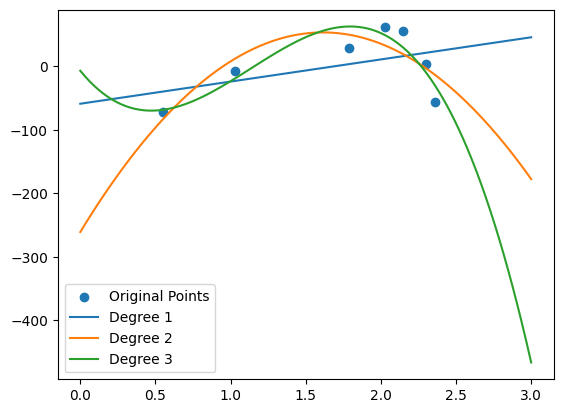

In [9]:
def p3formula(xi): return degree3A[3] * np.power(xi, 3) + degree3A[2]*np.power(xi, 2) + degree3A[1]*xi + degree3A[0]
def p2formula(xi): return degree2A[2] * np.power(xi, 2) + degree2A[1]*xi + degree2A[0]
def p1formula(xi): return degree1A[1] * xi + degree1A[0]
#Plot
#polynomialDeg1 = FindYHat(x, y, 1)
#polynomialDeg2 = FindYHat(x, y, 2)
#polynomialDeg3 = FindYHat(x, y, 3)
Xline = np.linspace(0, 3, 100)

plt.scatter(x,y, label="Original Points")
plt.plot(Xline, p1formula(np.linspace(0, 3, 100)), label="Degree 1") 
plt.plot(Xline, p2formula(np.linspace(0, 3, 100)), label="Degree 2")
plt.plot(Xline, p3formula(np.linspace(0, 3, 100)), label="Degree 3")
plt.legend()

---  
# Question 4

Contributions from Question 4:
- Monique Kubovsky: Wrote and tested code
- Ibet Gonzalez Viltres: Reviewed Code
- Jason Li: Reviewed Code

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.optimize import curve_fit

In [10]:
#data values
x_i = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y_i = np.array([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])
y_log = np.log(y_i)

In [ ]:
#model for y=b*e**(a*x) by taking natural log of both sides
#this gives ln(y)=ln(b)+ax

In [12]:
#calculate a
numerator = np.sum(x_i)*np.sum(y_log) - 10*np.sum(x_i*y_log)
denominator = np.sum(x_i)**2 - 10*np.sum(x_i**2)
a = numerator/denominator

In [14]:
#calculate ln(b) and b
numerator = np.sum(y_log) - a*np.sum(x_i)
denominator = 10
b_log = numerator/denominator
b = np.exp(b_log)

In [15]:
#model
y_fit = b*np.exp(a*x_i)

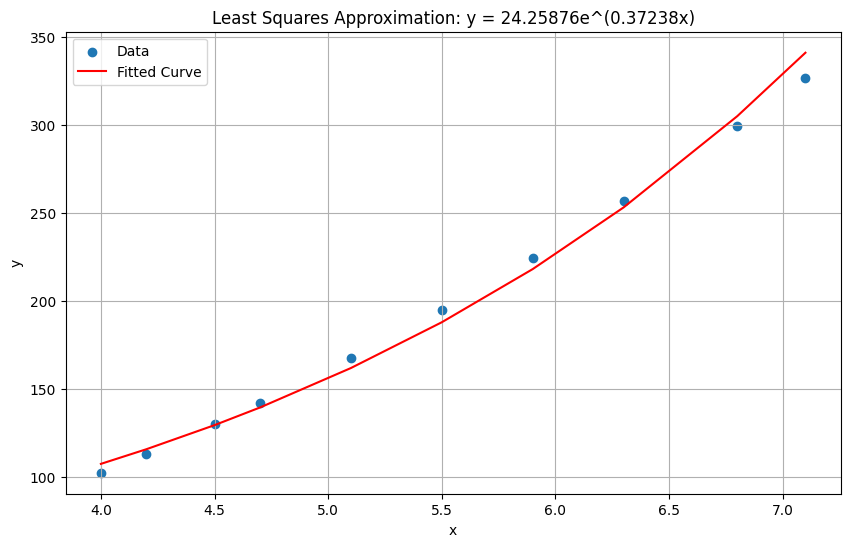

Estimated Values for a and b: a = 0.37238, b = 24.25876


In [16]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_i, y_i, label='Data')
plt.plot(x_i, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Least Squares Approximation: y = {b:.5f}e^({a:.5f}x)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated Values for a and b: a = {a:.5f}, b = {b:.5f}")

The least squares approximation equation is $y = 24.25876e^{0.37238}$ 